# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Using test score data from 2017 and 2018 to determine how to increase participation rates for the SAT and the ACT.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [7]:
act_2017.isna().count()

State            52
Participation    52
English          52
Math             52
Reading          52
Science          52
Composite        52
dtype: int64

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:The ACT has more test categories than the SAT. The scores are also different: the SAT scores are around 500, the ACT score are around 20. The SAT data has a 'Total' column, whereas, the ACT has a 'Composite'(average score) column. In addition, the ACT has a national average row. The data inside the 'Participation' column is string data although it should be numerical.

#### 4a. Does the data look complete? 

Answer: At a glance, it looks complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [8]:
sat_2017[(sat_2017['Math'] < 200) | (sat_2017['Math'] > 800) | 
         (sat_2017['Evidence-Based Reading and Writing'] < 200) | (sat_2017['Evidence-Based Reading and Writing'] > 800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [9]:
# I will change the wrong data types after this section, 
#but for getting errors I changed the act_2017[Composite] data type into float
act_2017['Composite'] = pd.to_numeric(act_2017['Composite'], errors='coerce')

act_2017[(act_2017['English'] < 1) | (act_2017['English'] > 36) | 
        (act_2017['Math'] < 1) | (act_2017['Math'] > 36) | 
        (act_2017['Reading'] < 1) | (act_2017['Reading'] > 36) | 
        (act_2017['Science'] < 1) | (act_2017['Science'] > 36) |
        (act_2017['Composite'] < 1) | (act_2017['Composite'] > 36)]
    

,State,Participation,English,Math,Reading,Science,Composite


In [10]:
act_2017['Composite'].sort_values().tail()

20    24.3
7     25.2
22    25.4
30    25.5
51     NaN
Name: Composite, dtype: float64

In [11]:
act_2017[act_2017['Science'] < 5]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Answer: The SAT is supposed to have a score range between 200 and 800 per subject. The ACT is supposed to have a score range between 1 and 36 per subject. Upon further research, the SAT data has a strange data entry inside the 'Math' column. The ACT data also has two strange data entries inside the 'Composite' and the 'Science' column. Those entries look like typos but fortunately, there are websites ([SAT](http://www.ipsr.ku.edu/ksdata/ksah/education/6ed16.pdf), [ACT](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)) which have the clean datasets of the SAT and the ACT which we can use to correct the typos.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [12]:
sat_2017.loc[20, 'Math'] = 524

In [13]:
act_2017.loc[21, 'Science'] = 23.2

In [14]:
act_2017.loc[51, 'Composite'] = 20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [16]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: According to the above code, the SAT and the ACT 'Participation' columns are string data types but should be  numerical. The ACT 'Composite' column was originally a string data type, but was changed to a float due to the processes above.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [17]:
#code
def erase_string(row, column_name, strings):
    
    return row[column_name].replace(strings, '')

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
#code
sat_2017['Participation'] = sat_2017.apply(lambda x: erase_string(x, 'Participation', '%'), axis=1)
act_2017['Participation'] = act_2017.apply(lambda x: erase_string(x, 'Participation', '%'), axis=1)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [19]:
#code
sat_2017['Participation'] = sat_2017['Participation'].astype(int)
act_2017['Participation'] = act_2017['Participation'].astype(int)
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [20]:
#Code:
print(sat_2017.dtypes)
print(act_2017.dtypes)

State                                 object
Participation                          int32
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State             object
Participation      int32
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
#code
sat_17_columns = {
    'State': 'state',
    'Participation': 'participation_sat_17',
    'Evidence-Based Reading and Writing': 'reading_and_writing_sat_17',
    'Math': 'math_sat_17',
    'Total': 'total_sat_17'
}
sat_2017.rename(columns=sat_17_columns, inplace=True)

act_17_columns = {
    'State': 'state',
    'Participation': 'participation_act_17',
    'English': 'english_act_17',
    'Math': 'math_act_17',
    'Reading': 'reading_act_17',
    'Science': 'science_act_17',
    'Composite': 'composite_act_17',
}
act_2017.rename(columns=act_17_columns, inplace=True)

In [22]:
sat_2017.head()

,state,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|sat_2017/act_2017|The Us state names|
|**participation_sat_17**|*integer*|sat_2017|The percentage of the particition rate for the SAT in a state | 
|**reading_and_writing_sat_17**|*integer*|sat_2017|The test score average for each state for the Reading and Writing portion of the SAT for all students who took the SAT in 2017 (units represent test score which range from a minimum of 200 to a maximum of 800)|
|**math_sat_17**|*integer*|sat_2017|The test score average for each state for the Math portion of the SAT for all students who took the SAT in 2017 (units represent test score which range from a minimum of 200 to a maximum of 800)|
|**total_sat_17**|*integer*|sat_2017|The test score average for each state for the Total portion of the SAT for all students who took the SAT in 2017 (units represent test score which range from a minimum of 400 to a maximum of 1600)|
|**participation_act_17**|*integer*|act_2017|The percentage of the particition rate for the ACT in a state| 
|**english_act_17**|*float*|act_2017|The test score average for each state for the English portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|
|**math_act_17**|*float*|act_2017|The test score average for each state for the Math portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|
|**reading_act_17**|*float*|act_2017|The test score average for each state for the Reading portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|
|**science_act_17**|*float*|act_2017|The test score average for each state for the Science portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|
|**composite_act_17**|*float*|act_2017|The test score average for each state for the Composite portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [23]:
#code
act_2017.drop(index=[0], inplace=True)

In [24]:
act_2017.shape

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [25]:
#Code:
merged_act_sat_17 = pd.merge(left=act_2017, right=sat_2017, on='state')

In [26]:
merged_act_sat_17.shape

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [27]:
#code
merged_act_sat_17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

####  Read In SAT & ACT  Data

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes.

In [28]:
#Code:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

####  Display Data

Print the first 10 rows of each dataframe

In [29]:
sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [30]:
sat_2018.shape

(51, 5)

In [31]:
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [32]:
act_2018.head(10)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


In [33]:
act_2018.shape

(52, 3)

In [34]:
act_2018.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

The SAT dataset in 2018 looks similar to the one in 2017. The ACT dataset in 2018 has fewer columns than the one in 2017.
The SAT and the ACT in 2018 looks complete (no missing data), and the ACT looks like it has an extra row.

#### Fix the data

In [35]:
act_2018['State'].value_counts().head()

Maine           2
Iowa            1
Florida         1
Minnesota       1
Rhode Island    1
Name: State, dtype: int64

In [36]:
act_2018[act_2018['State'] == 'Maine']

,State,Participation,Composite
19,Maine,7%,24.0
20,Maine,7%,24.0


In [37]:
act_2018.drop(index=20, inplace=True)

In [38]:
act_2018[act_2018['State'] == 'Maine']

,State,Participation,Composite
19,Maine,7%,24.0


In [39]:
act_2018.shape

(51, 3)

The ACT dataset had two rows of data for the same state, but was removed.

In [40]:
act_2018.loc[8, 'State'] = 'District of Columbia'

The data entry for Washington D.C. has the name in the 'State' column as 'District of columbia' (Columbia all lowercase).

Since the SAT and the ACT in 2018 have the same score ranges as the tests in 2017, the data should be within their respective ranges.

In [41]:
sat_2018[(sat_2018['Math'] < 200) | (sat_2018['Math'] > 800) | 
         (sat_2018['Evidence-Based Reading and Writing'] < 200) | (sat_2018['Evidence-Based Reading and Writing'] > 800)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [42]:
act_2018[(act_2018['Composite'] < 1) | (act_2018['Composite'] > 36) ]

,State,Participation,Composite


#### Display the data types of each feature. 

In [43]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [44]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

According to the above code, the SAT and the ACT 'Participation' columns are string data types but should be  numerical.

#### Fix Incorrect Data Types

In [45]:
#code
sat_2018['Participation'] = sat_2018.apply(lambda x: erase_string(x, 'Participation', '%'), axis=1)
act_2018['Participation'] = act_2018.apply(lambda x: erase_string(x, 'Participation', '%'), axis=1)

In [46]:
#code
sat_2018['Participation'] = sat_2018['Participation'].astype(int)
act_2018['Participation'] = act_2018['Participation'].astype(int)

In [47]:
#Code:
print(sat_2018.dtypes)
print(act_2018.dtypes)

State                                 object
Participation                          int32
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State             object
Participation      int32
Composite        float64
dtype: object


####  Rename Columns

Column names should be lowercase and unique.

In [48]:
#code
sat_18_columns = {
    'State': 'state',
    'Participation': 'participation_sat_18',
    'Evidence-Based Reading and Writing': 'reading_and_writing_sat_18',
    'Math': 'math_sat_18',
    'Total': 'total_sat_18'
}
sat_2018.rename(columns=sat_18_columns, inplace=True)

act_18_columns = {
    'State': 'state',
    'Participation': 'participation_act_18',
    'Composite': 'composite_act_18'
}
act_2018.rename(columns=act_18_columns, inplace=True)

#### A data dictionary of the data of the SAT and the ACT in 2018

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|sat_2018/act_2018|The US state names|
|**participation_sat_18**|*integer*|sat_2018|The percentage of the particition rate for the SAT in a state | 
|**reading_and_writing_sat_18**|*integer*|sat_2018|The test score average for each state for the Reading and Writing portion of the SAT for all students who took the SAT in 2018 (units represent test score which range from a minimum of 200 to a maximum of 800)|
|**math_sat_18**|*integer*|sat_2018|The test score average for each state for the Math portion of the SAT for all students who took the SAT in 2018 (units represent test score which range from a minimum of 200 to a maximum of 800)|
|**total_sat_18**|*integer*|sat_2018|The test score average for each state for the Total portion of the SAT for all students who took the SAT in 2018 (units represent test score which range from a minimum of 400 to a maximum of 1600)|
|**participation_act_18**|*integer*|act_2018|The percentage of the particition rate for the ACT in a state| 
|**composite_act_18**|*float*|act_2018|The test score average for each state for the Composite portion of the ACT for all students who took the ACT in 2018 (units represent test score which range from a minimum of 1 to a maximum of 36)|

####  Merge Dataframes


In [49]:
merged_act_sat_18 = pd.merge(left=act_2018, right=sat_2018, on='state')

In [50]:
merged_act_sat_18.shape

(51, 7)

In [51]:
merged_act_sat_18.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [52]:
act_sat_final = pd.merge(left=merged_act_sat_17, right=merged_act_sat_18, on='state')

In [53]:
act_sat_final.to_csv('../data/final.csv')


#### A data dictionary of the all combined data

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|act_sat_final|The Us state names|
|**participation_sat_17**|*integer*|act_sat_final|The percentage of the particition rate for the SAT in a state | 
|**reading_and_writing_sat_17**|*integer*|act_sat_final|The test score average for each state for the Reading and Writing portion of the SAT for all students who took the SAT in 2017 (units represent test score which range from a minimum of 200 to a maximum of 800)|
|**math_sat_17**|*integer*|act_sat_final|The test score average for each state for the Math portion of the SAT for all students who took the SAT in 2017 (units represent test score which range from a minimum of 200 to a maximum of 800)|
|**total_sat_17**|*integer*|act_sat_final|The test score average for each state for the Total portion of the SAT for all students who took the SAT in 2017 (units represent test score which range from a minimum of 400 to a maximum of 1600)|
|**participation_act_17**|*integer*|act_sat_final|The percentage of the particition rate for the ACT in a state| 
|**english_act_17**|*float*|act_sat_final|The test score average for each state for the English portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|
|**math_act_17**|*float*|act_sat_final|The test score average for each state for the Math portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|
|**reading_act_17**|*float*|act_sat_final|The test score average for each state for the Reading portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|
|**science_act_17**|*float*|act_sat_final|The test score average for each state for the Science portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|
|**composite_act_17**|*float*|act_sat_final|The test score average for each state for the Composite portion of the ACT for all students who took the ACT in 2017 (units represent test score which range from a minimum of 1 to a maximum of 36)|
|**participation_sat_18**|*integer*|act_sat_final|The percentage of the particition rate for the SAT in a state | 
|**reading_and_writing_sat_18**|*integer*|act_sat_final|The test score average for each state for the Reading and Writing portion of the SAT for all students who took the SAT in 2018 (units represent test score which range from a minimum of 200 to a maximum of 800)|
|**math_sat_18**|*integer*|act_sat_final|The test score average for each state for the Math portion of the SAT for all students who took the SAT in 2018 (units represent test score which range from a minimum of 200 to a maximum of 800)|
|**total_sat_18**|*integer*|act_sat_final|The test score average for each state for the Total portion of the SAT for all students who took the SAT in 2018 (units represent test score which range from a minimum of 400 to a maximum of 1600)|
|**participation_act_18**|*integer*|act_sat_final|The percentage of the particition rate for the ACT in a state| 
|**composite_act_18**|*float*|act_sat_final|The test score average for each state for the Composite portion of the ACT for all students who took the ACT in 2018 (units represent test score which range from a minimum of 1 to a maximum of 36)|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [54]:
#Code:
act_sat_final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english_act_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
composite_act_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
participation_sat_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
reading_and_writing_sat_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [55]:
#code
def calc_sd(col):
    n = len(col)
    
    sum_of_data = 0
    for data in col:
        sum_of_data += data
        
    mean_value = sum_of_data / n
    
    mean_deviation = 0
    for data in col:
        mean_deviation = mean_deviation + (data - mean_value) ** 2
    
    variance = mean_deviation / n
    
    return variance ** (1 / 2)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [56]:
#Code:
act_sat_final_without_state = act_sat_final[act_sat_final.columns[act_sat_final.columns != 'state']] # Remove 'state' for an iteration
sd = {column: calc_sd(data) for column, data in act_sat_final_without_state.iteritems()}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: No, the manual std above the code does not match with the std from pandas describe. Because the pandas std uses unbiased variance as a default (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.std.html). The numpy std maches the standard deviations calculated manually because the numpy std uses sample variance as a default (https://numpy.org/doc/1.18/reference/generated/numpy.std.html).

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### The highest and lowest participation for each test and each year

In [57]:
# The highest participation rate in 2017 SAT
act_sat_final[['state', 'participation_sat_17']].sort_values('participation_sat_17', ascending=False).head()

,state,participation_sat_17
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96


In [58]:
# The lowest participation rate in 2017 SAT
act_sat_final[['state', 'participation_sat_17']].sort_values('participation_sat_17').head()

,state,participation_sat_17
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3


The highest SAT participation rates in 2017 are in the District of Columbia, Michigan, Connecticut, and Delaware.
The lowest SAT participation rates in 2017 are in North Dakota, Mississippi, and Iowa.

In [59]:
# The highest participation rate in 2018 SAT
act_sat_final[['state', 'participation_sat_18']].sort_values('participation_sat_18', ascending=False).head()

,state,participation_sat_18
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100


In [60]:
# The lowest participation rate in 2018 SAT
act_sat_final[['state', 'participation_sat_18']].sort_values('participation_sat_18').head()

,state,participation_sat_18
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3


The highest participation rate for the SAT in 2018 is almost the same as the rate in 2017. The lowest participation rate for the SAT in 2018 is North Dakota which is the same as in 2017.

In [61]:
# The highest participation rate in 2017 ACT
act_sat_final[['state', 'participation_act_17']].sort_values('participation_act_17', ascending=False).head()

,state,participation_act_17
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100


In [62]:
# The lowest participation rate in 2017 ACT
act_sat_final[['state', 'participation_act_17']].sort_values('participation_act_17').head()

,state,participation_act_17
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23


The highest participation rates for the ACT in 2017 are Alabama, Kentucky, Wisconsin, etc. The lowest participation rate for the ACT in 2017 is Maine.

In [63]:
# The highest participation rate in 2018 ACT
act_sat_final[['state', 'participation_act_18']].sort_values('participation_act_18', ascending=False).head()

,state,participation_act_18
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100


In [64]:
# The lowest participation rate in 2018 ACT
act_sat_final[['state', 'participation_act_18']].sort_values('participation_act_18').head()

,state,participation_act_18
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


The highest and lowest participation rate for the ACT in 2018 which is the same as in 2017.

#### Do any states with 100% participation on a given test have a rate change year-to-year?


In [65]:
act_sat_final[
    ((act_sat_final['participation_sat_17'] == 100) & (act_sat_final['participation_sat_18'] != 100)) |
    ((act_sat_final['participation_sat_17'] != 100) & (act_sat_final['participation_sat_18'] == 100))
]['state']

5                 Colorado
8     District of Columbia
12                   Idaho
Name: state, dtype: object

In [66]:
act_sat_final[act_sat_final['state'] == 'Colorado'][['state', 'participation_sat_17', 'participation_sat_18']]

,state,participation_sat_17,participation_sat_18
5,Colorado,11,100


The participation rates in Colorado changed from 11% in 2017 to 100% in 2018. Colorado might make the SAT mandatory in 2018.

In [67]:
act_sat_final[
    ((act_sat_final['participation_act_17'] == 100) & (act_sat_final['participation_act_18'] != 100)) |
    ((act_sat_final['participation_act_17'] != 100) & (act_sat_final['participation_act_18'] == 100))
]['state']

5      Colorado
23    Minnesota
27     Nebraska
35         Ohio
Name: state, dtype: object

In [68]:
act_sat_final[act_sat_final['state'] == 'Colorado'][['state', 'participation_act_17', 'participation_act_18']]

,state,participation_act_17,participation_act_18
5,Colorado,100,30


Colorado looks like that they had made the ACT mandatory in 2017, but switched to making the SAT mandatory instead in 2018.

#### Do any states show have >50% participation on both tests either year?

In [69]:
act_sat_final[(act_sat_final['participation_sat_17'] > 50) & (act_sat_final['participation_act_17'] > 50)]['state']

9     Florida
10    Georgia
11     Hawaii
Name: state, dtype: object

In [70]:
act_sat_final[(act_sat_final['participation_sat_18'] > 50) & (act_sat_final['participation_act_18'] > 50)]['state']

9            Florida
10           Georgia
11            Hawaii
33    North Carolina
40    South Carolina
Name: state, dtype: object

In [71]:
act_sat_final[act_sat_final['state'] == 'Florida'][[
    'state', 'participation_sat_17', 'participation_act_17', 'participation_sat_18', 'participation_act_18'
]]

,state,participation_sat_17,participation_act_17,participation_sat_18,participation_act_18
9,Florida,83,73,56,66


Florida has high participation rates for both of the tests (SAT and ACT) in 2017 and 2018. Florida might not have a mandatory requirement for students to take a standardized test but have policies in place to encourage them to take it.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

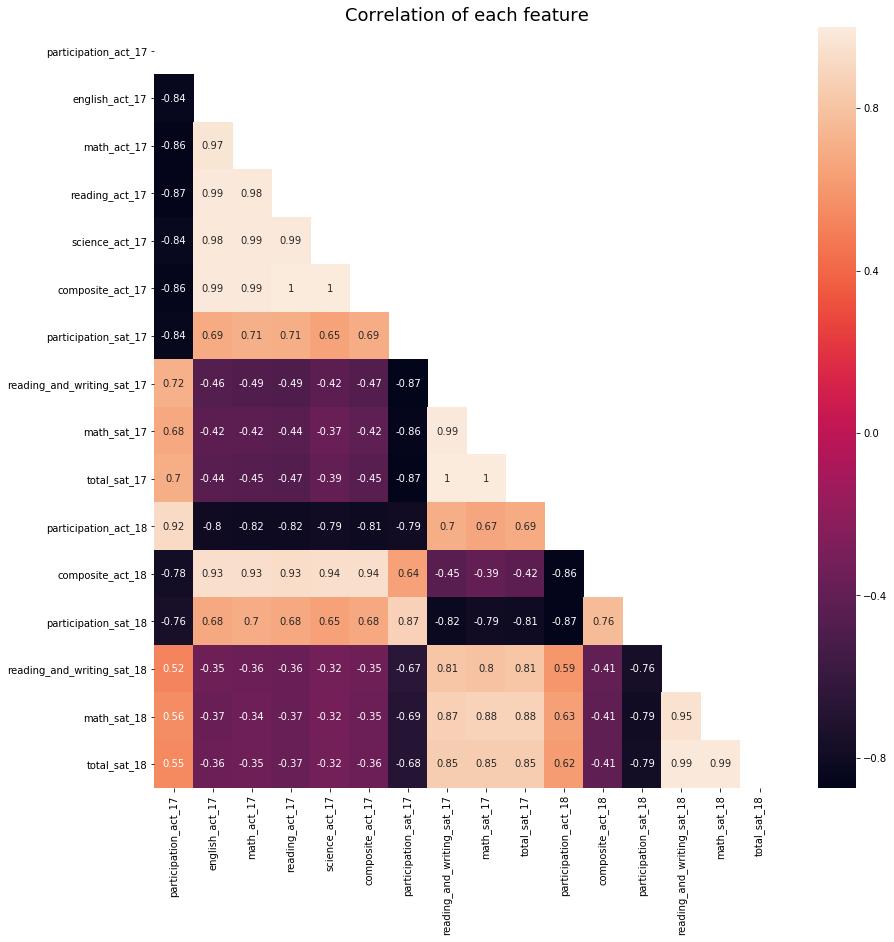

In [72]:
fig, ax = plt.subplots(figsize=(14, 14))

mask = np.zeros_like(act_sat_final.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(act_sat_final.corr(), annot=True, mask=mask);

ax.set_title('Correlation of each feature', fontsize=18);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [73]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, figsize=[10, 10], xlim=[], ylim=[]):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    fig.set_figheight(figsize[0]);
    fig.set_figwidth(figsize[1]);
    plt.subplots_adjust(wspace=0.2, hspace=0.4) # Operate the distance between subplots
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]);
        ax[i].set_xlabel(list_of_xlabels[i]);
        
        if len(xlim) != 0:
            ax[i].set_xlim(left=xlim[i][0], right=xlim[i][1]);
        else:
            continue
        
        if len(ylim) != 0:
            ax[i].set_ylim(bottom=ylim[i][0], top=ylim[i][1]);
        else:
            continue
        
    

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

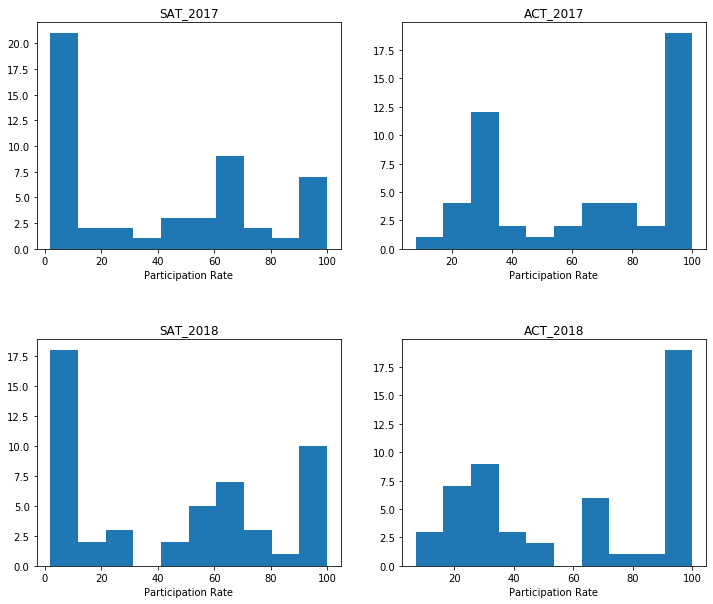

In [74]:
# Code
subplot_histograms(
    act_sat_final,
    ['participation_sat_17', 'participation_act_17', 'participation_sat_18', 'participation_act_18'],
    ['SAT_2017', 'ACT_2017', 'SAT_2018', 'ACT_2018'], 
    ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate'],
    [10, 12]
)

It looks like that the participation rates of the SAT skewed to the left, whereas the participation rates of the ACT skewed to the right.

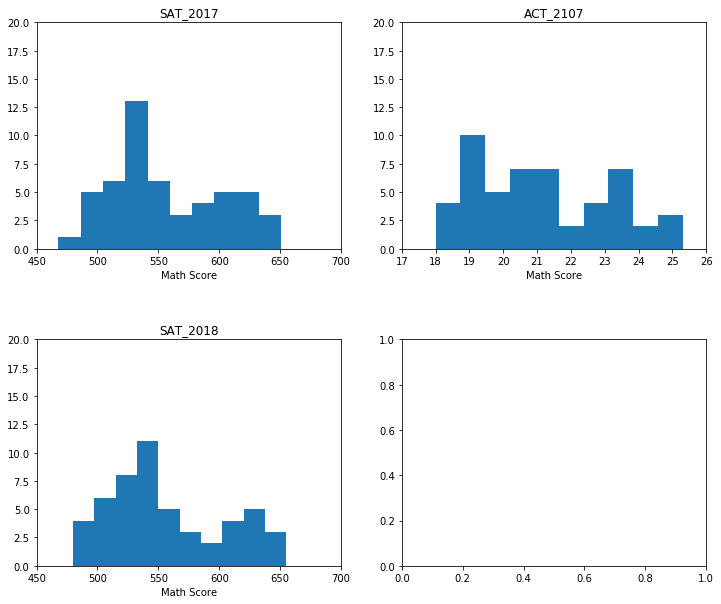

In [75]:
subplot_histograms(
    act_sat_final,
    ['math_sat_17', 'math_act_17', 'math_sat_18'],
    ['SAT_2017', 'ACT_2107', 'SAT_2018'], 
    ['Math Score', 'Math Score', 'Math Score'],
    (10, 12),
    [[450, 700], [17, 26], [450, 700]],
    [[0, 20], [0, 20], [0, 20]]
)

The Math score histograms look close to a nomal distribution compared to the participation rates.

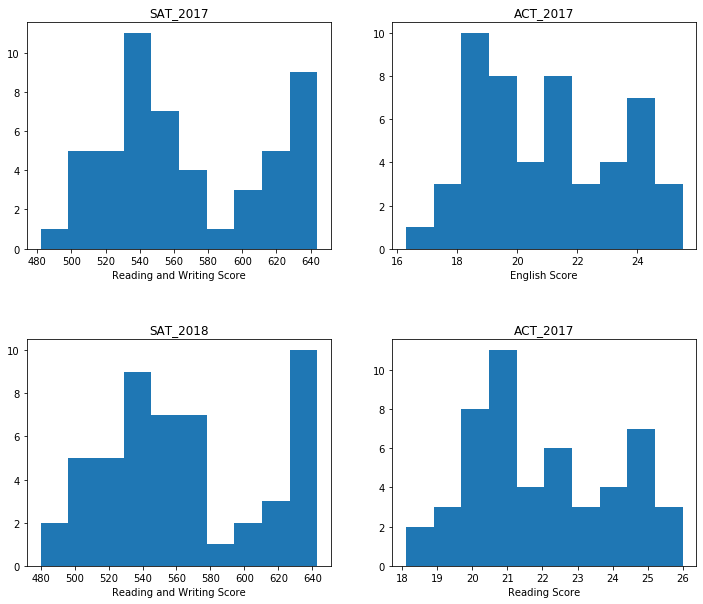

In [76]:
subplot_histograms(
    act_sat_final,
    ['reading_and_writing_sat_17', 'english_act_17', 'reading_and_writing_sat_18', 'reading_act_17'],
    ['SAT_2017', 'ACT_2017', 'SAT_2018', 'ACT_2017'], 
    ['Reading and Writing Score', 'English Score', 'Reading and Writing Score', 'Reading Score'],
    (10, 12),
)

The SAT Verbal (Reading and Writing) scores look like they have 2 peaks. The ACT English and Reading look a bit like a normal distributions.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [77]:
# Code
def subplot_scatterplot(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, figsize=[10, 10], xlim=[], ylim=[], highlight_one_point=[], highlight_labels=[]):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    fig.set_figheight(figsize[0]);
    fig.set_figwidth(figsize[1]);
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column[0]], dataframe[column[1]]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]);
        ax[i].set_xlabel(list_of_xlabels[i]);
        ax[i].set_ylabel(list_of_ylabels[i]);
        
        # If you have one point to highlight
        if len(highlight_one_point) != 0:
            ax[i].scatter(highlight_one_point[i][0], highlight_one_point[i][1], label=highlight_labels[i])
            ax[i].legend()
        
        if len(xlim) != 0:
            ax[i].set_xlim(left=xlim[i][0], right=xlim[i][1]);
        else:
            continue
        
        if len(ylim) != 0:
            ax[i].set_ylim(bottom=ylim[i][0], top=ylim[i][1]);
        else:
            continue
    
    

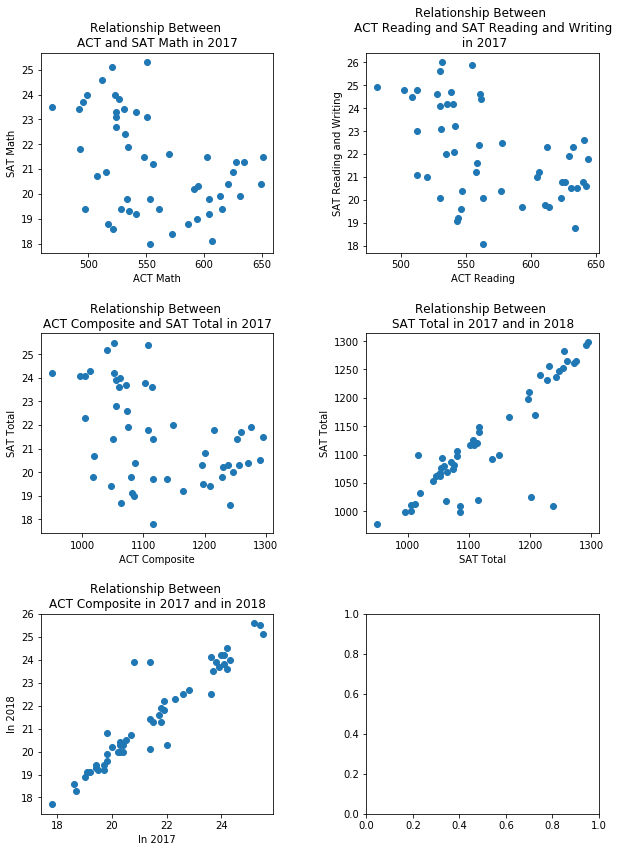

In [78]:
subplot_scatterplot(
    act_sat_final,
    [
        ['math_sat_17', 'math_act_17'],
        ['reading_and_writing_sat_17', 'reading_act_17'],
        ['total_sat_17', 'composite_act_17'],
        ['total_sat_17', 'total_sat_18'],
        ['composite_act_17', 'composite_act_18']
        
    ],
    [
        'Relationship Between \nACT and SAT Math in 2017', 
        'Relationship Between \nACT Reading and SAT Reading and Writing\n in 2017', 
        'Relationship Between \nACT Composite and SAT Total in 2017', 
        'Relationship Between \nSAT Total in 2017 and in 2018', 
        'Relationship Between \nACT Composite in 2017 and in 2018'
    ],
    ['ACT Math', 'ACT Reading', 'ACT Composite', 'SAT Total', 'In 2017'],
    ['SAT Math', 'SAT Reading and Writing', 'SAT Total', 'SAT Total', 'In 2018'],
    [14, 10]
)

The scatter plots shows that the SAT Math scores and the ACT Math scores, the SAT Verbal scores and the ACT Reading scores, and the SAT Total scores and the ACT Composite scores all have negative correlations. Whereas both the SAT Total score in 2017 and 2018 along with the ACT Composite score in 2017 and 2018 have strong positive correlations.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [79]:
# Code
def plot_boxplot(dataframe, list_of_columns, orient, list_of_ticks, title, x_label):
    data = dataframe[list_of_columns]
    ax = sns.boxplot(data=data, orient=orient);
    ax.set_title(title)
    ax.set_yticklabels(list_of_ticks);
    ax.set_xlabel(x_label);

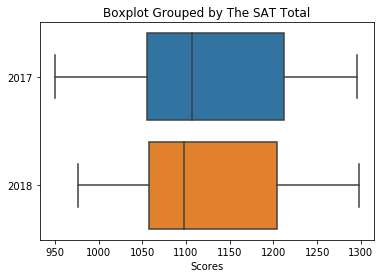

In [80]:
plot_boxplot(
    act_sat_final,
    ['total_sat_17', 'total_sat_18'],
    'h',
    ['2017', '2018'],
    'Boxplot Grouped by The SAT Total',
    'Scores'
)

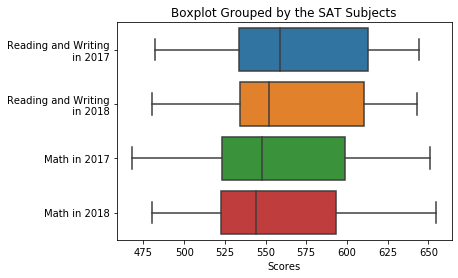

In [81]:
plot_boxplot(
    act_sat_final,
    ['reading_and_writing_sat_17', 'reading_and_writing_sat_18', 'math_sat_17', 'math_sat_18'],
    'h',
    ['Reading and Writing\n in 2017', 'Reading and Writing\n in 2018', 'Math in 2017', 'Math in 2018'],
    'Boxplot Grouped by the SAT Subjects',
    'Scores'   
)

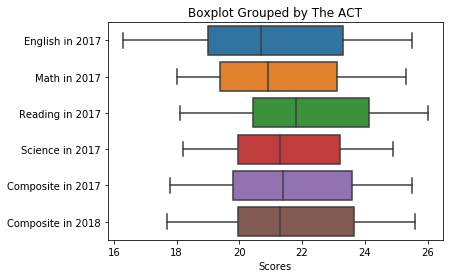

In [82]:
plot_boxplot(
    act_sat_final,
    [
        'english_act_17',  
        'math_act_17', 
        'reading_act_17',
        'science_act_17',
        'composite_act_17',
        'composite_act_18',
    ],
    'h',
    [
        'English in 2017', 
        'Math in 2017', 
        'Reading in 2017', 
        'Science in 2017', 
        'Composite in 2017',
        'Composite in 2018', 
    ],
    'Boxplot Grouped by The ACT',
    'Scores'   
)

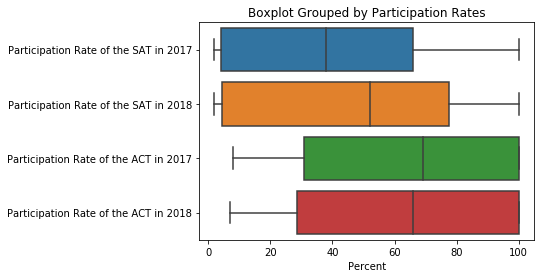

In [83]:
plot_boxplot(
    act_sat_final,
    [
        'participation_sat_17',  
        'participation_sat_18', 
        'participation_act_17',
        'participation_act_18'
    ],
    'h',
    [
        'Participation Rate of the SAT in 2017', 
        'Participation Rate of the SAT in 2018', 
        'Participation Rate of the ACT in 2017',
        'Participation Rate of the ACT in 2018'
    ],
    'Boxplot Grouped by Participation Rates',
    'Percent'   
)

The box plots show that the participation rates between the SAT and the ACT have a significant difference. The median ACT participation rate is greater than the SAT's median participation rate. There might be a tendency for students/schools to choose the ACT as a standardized test rather than the SAT for some reason.


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

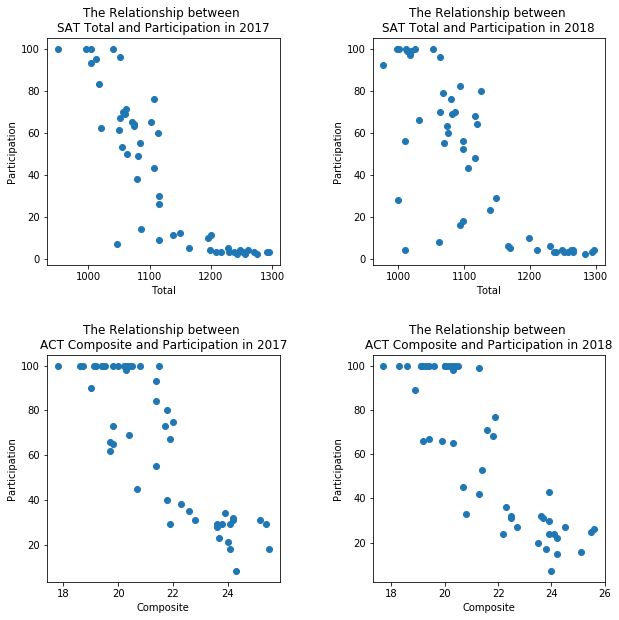

In [84]:
subplot_scatterplot(
    act_sat_final,
    [
        ['total_sat_17', 'participation_sat_17'],
        ['total_sat_18', 'participation_sat_18'],
        ['composite_act_17', 'participation_act_17'],
        ['composite_act_18', 'participation_act_18']
    ],
    [
        'The Relationship between \nSAT Total and Participation in 2017',
        'The Relationship between \nSAT Total and Participation in 2018',
        'The Relationship between \nACT Composite and Participation in 2017', 
        'The Relationship between \nACT Composite and Participation in 2018'
    ],
    ['Total','Total', 'Composite', 'Composite' ],
    ['Participation', 'Participation', 'Participation', 'Participation'],
    [10,10]
)

These scatter plots show that the Total/Composite scores versus the Participation rate for the SAT and the ACT have negative correlations. There could be a potential trade-off as states with high participation rates have low composite/total scores.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [85]:
# calculate the measures of characteristics of the dataset
mean_each_features = act_sat_final.describe().mean()
skewness_each_features = act_sat_final_without_state.apply(lambda x: stats.skew(x), axis=0)
kurtosis_each_features = act_sat_final_without_state.apply(lambda x: stats.kurtosis(x), axis=0)

data_description = pd.DataFrame(
    [mean_each_features.values, skewness_each_features.values, kurtosis_each_features.values],
    columns=mean_each_features.keys()
).T

data_description.columns = ['mean', 'skewness', 'kurtosis']
data_description

,mean,skewness,kurtosis
participation_act_17,57.049468,-0.192118,-1.591690
english_act_17,22.385631,0.342202,-0.910820
math_act_17,22.608043,0.322817,-1.001193
reading_act_17,23.197625,0.261378,-1.003802
science_act_17,22.717542,0.212334,-0.980227
composite_act_17,22.830038,0.310326,-1.005096
participation_sat_17,42.010069,0.336175,-1.364383
reading_and_writing_sat_17,437.160569,0.264607,-1.219351
math_sat_17,430.562969,0.354215,-0.952917
total_sat_17,861.136606,0.301683,-1.115401


Answers: Comparing with the same subjects in the same tests, the mean values look similar over years. Almost all features have skewness less than plus/minus 0.5. It means that the distributions are a bit skewed compared to a normal distribution. Kurtosis data show that every data has a kurtosis value at around -1. Therefore, the features of the distributions have dull/different spikes compared to a normal distribution. Despite these statistical facts, the histograms of math scores for the SAT and English/reading scores for the ACT looks roughly like a normal distribution.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Some features of the data look a bit like a normal distribution, especially math, reading, and english when referencing the histograms.

Q-Q plot provides you if a distribution is a normal distribution when the data points line up in a diagonal line perfectly.

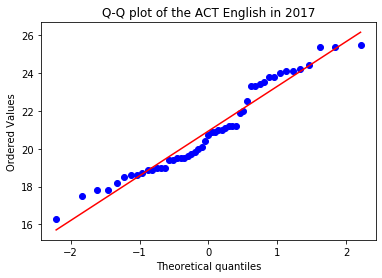

In [86]:
stats.probplot(act_sat_final['english_act_17'], dist='norm', plot=plt);
plt.title('Q-Q plot of the ACT English in 2017');

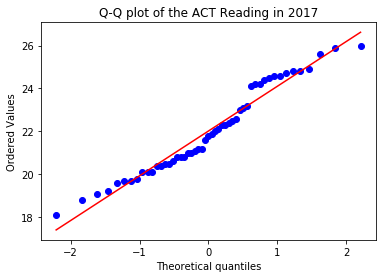

In [87]:
stats.probplot(act_sat_final['reading_act_17'], dist='norm', plot=plt);
plt.title('Q-Q plot of the ACT Reading in 2017');

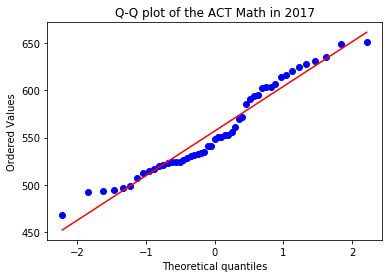

In [88]:
stats.probplot(act_sat_final['math_sat_17'], dist='norm', plot=plt);
plt.title('Q-Q plot of the ACT Math in 2017');

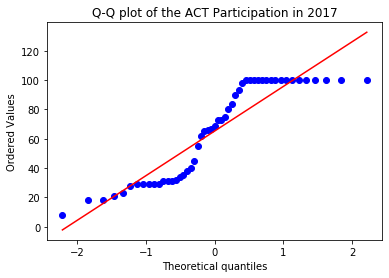

In [89]:
stats.probplot(act_sat_final['participation_act_17'], dist='norm', plot=plt);
plt.title('Q-Q plot of the ACT Participation in 2017');

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The Q-Q plots above show that math and reading are close to a normal distribution. Contrastingly, since the particition rate deviates considerably from the diagonal line, it is far from a normal distribution. No matter what the distribution is, the estimates (like confidence interval) are not affected. 



#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Yes, the data would be considerd a sample since the 51 data entry samples were extracted from their respective state population (all students in each state). I assume that the data would not be calculated from the whole population since it is extremely difficult to gather data for every single high school junior-aged person in each state. To know the parameter of the population, a confidence interval needs to be calculated. 

As a reference...

The 95% confidence interval of the SAT participation rate mu is between 30 and 49.

The 95% confidence interval of the ACT participation rate mu is between 56 and 73.

In [90]:
# caluculate cinfident interval
def conf_int(data, z):
    sample_mean = np.mean(data)
    sigma = np.std(data)
    n = len(data)
    
    return (sample_mean - z * sigma/n**0.5, sample_mean + z * sigma/n**0.5)

print('The SAT confident interval' + str(conf_int(act_sat_final['participation_sat_17'], 1.96)))
print('The ACT confident interval' + str(conf_int(act_sat_final['participation_act_17'], 1.96)))

The SAT confident interval(30.217467067592388, 49.390376069662516)
The ACT confident interval(56.52060109975314, 73.98920282181548)


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, it is inappropriate because they have a different score range. The data is supposed to be standardized for comparisons.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [91]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Delaware has a 100% participation rate for the SAT in 2017. The state has a 18% participation rate for the ACT in 2017. According to this [Website](https://whyy.org/articles/sat-to-the-rescue-why-delaware-and-other-states-are-embracing-a-new-role-for-an-old-test/), Delaware made the SAT compulsory for students in 2016. The trend seems to continue to 2017.

Alabama has a 100% participation rate for the ACT in 2017. The state has a 5% participation rate for the SAT in 2017. According to [Halle Edwards](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows), Alabama has made the ACT mandatory for students preparing for college. Some other states also seem to make the ACT mandatory such as Kentucky and Mississipi.

Those two states are good examples that the more the participation rates go up, the less the scores go down. There might be a reason that if the test is mandatory, many students who do not want to take the test end up taking the test which might decrease the mean total scores.

Florida has an 83% participation rate for the SAT in 2017. The state has a 73% participation for the ACT in 2017. Florida might not have a mandatory requirement for students to take a standardized test but have policies in place to encourage them to take it.


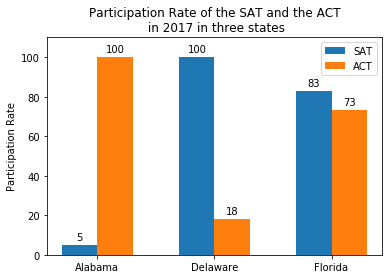

In [92]:
# Plot the participation rates for the 2017 tests in Alabama, Delaware
three_states = act_sat_final[(act_sat_final['state'] == 'Alabama')|
                            (act_sat_final['state'] == 'Delaware')| 
                            (act_sat_final['state'] == 'Florida')]

fig, ax = plt.subplots()
rect1 = ax.bar([1, 2, 3], three_states['participation_sat_17'], width=0.3, label='SAT');
rect2 = ax.bar([1.3, 2.3, 3.3], three_states['participation_act_17'], width=0.3, label='ACT');
ax.set_xticks([1.15, 2.15, 3.15]);
ax.set_xticklabels(['Alabama', 'Delaware', 'Florida']);
ax.set_title('Participation Rate of the SAT and the ACT\n in 2017 in three states');
ax.set_ylabel('Participation Rate');
ax.set_ylim(0, 110)
ax.set_yticks(list(range(0, 101, 20)))
ax.legend()

# plot the values on the graph
def auto_label(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')
auto_label(rect1)
auto_label(rect2)

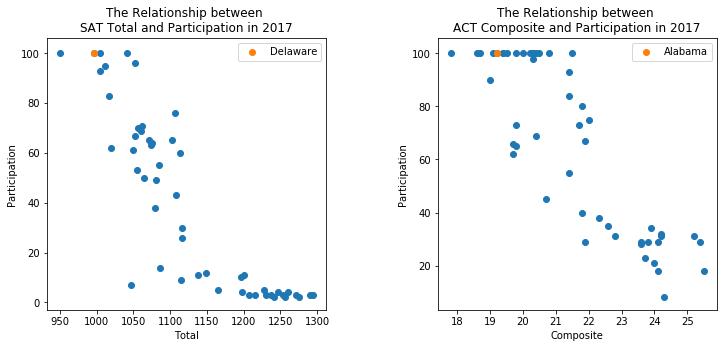

In [93]:
# Scatter plots to see the relationships between participation rates and scores in 2017
subplot_scatterplot(
    act_sat_final,
    [
        ['total_sat_17', 'participation_sat_17'],
        ['composite_act_17', 'participation_act_17'],
    ],
    [
        'The Relationship between \nSAT Total and Participation in 2017',
        'The Relationship between \nACT Composite and Participation in 2017',
    ],
    ['Total', 'Composite' ],
    ['Participation',  'Participation'],
    [5,12],
    [],
    [],
    [
        [
            act_sat_final[act_sat_final['state'] == 'Delaware']['total_sat_17'],
            act_sat_final[act_sat_final['state'] == 'Delaware']['participation_sat_17']
        ],
        [
            act_sat_final[act_sat_final['state'] == 'Alabama']['composite_act_17'],
            act_sat_final[act_sat_final['state'] == 'Alabama']['participation_act_17']
        ]
    ],
    ['Delaware', 'Alabama']
)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [94]:
# find the participation rates less than 50% in all tests
act_sat_final[(act_sat_final['participation_sat_17'] < 50) & (act_sat_final['participation_act_17'] < 50) &
             (act_sat_final['participation_sat_18'] < 50) & (act_sat_final['participation_act_18'] < 50)]

,state,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17,participation_act_18,composite_act_18,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18
37,Oregon,40,21.2,21.5,22.4,21.7,21.8,43,560,548,1108,42,21.3,48,564,553,1117


There are some states that have made the tests mandatory. If other states were to make the tests mandatory, they could see an increase in the participation rate of the tests.

For example, Oregon has participation rates of the both tests less than 50% year and year.
Oregon can increase its participation rate for a test if they make it mandatory.

However, there could be a potential trade-off as states with high participation rates have low composite/total scores.
A potential reason could be that students that normally have no interest in taking the tests are forced to take them.
Instead of making the tests mandatory, it might be better to set up initiatives to foster interests to take the tests.

For further research, the household income of the students' parents would help to determine whether income has an effect on participation rates. If so, states can set a policy to help low income students.